In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("loan_approved.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [7]:
data.loc[data['Gender'].isnull(),'Gender']='male'

In [8]:
data.Gender.isnull().sum()

np.int64(0)

In [9]:
data.loc[data['Credit_History'].isnull(),'Credit_History']=0.0

In [10]:
data.Credit_History.isnull().sum()

np.int64(0)

In [11]:
data.loc[data['Married'].isnull(),'Married']='yes'

In [12]:
data.loc[data['Self_Employed'].isnull(),'Self_Employed']='no'

In [13]:
data.loc[data['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=360.0

In [14]:
data.loc[data['Dependents'].isnull(),'Dependents']='0'

In [15]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [16]:
data.loc[data['LoanAmount'].isnull(),'LoanAmount']=data['LoanAmount'].median()

In [17]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [18]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='Count'>

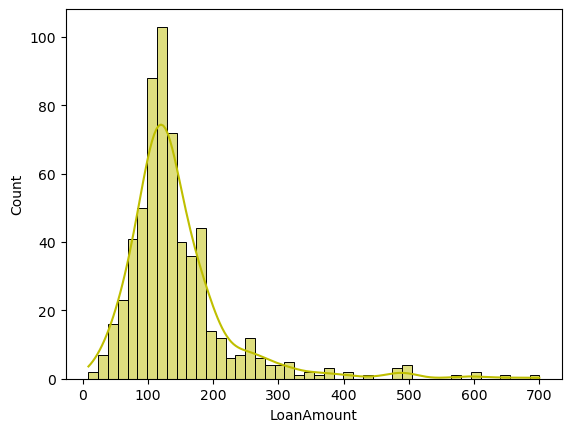

In [19]:
sns.histplot(x=data.LoanAmount,kde=True,color='y')

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

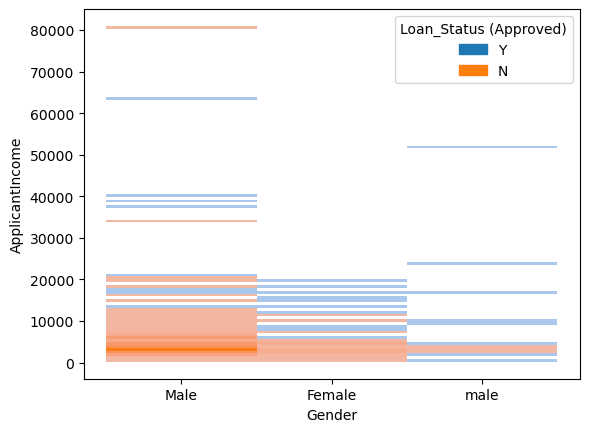

In [20]:
sns.histplot(x='Gender',y='ApplicantIncome',data=data,hue='Loan_Status (Approved)')

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


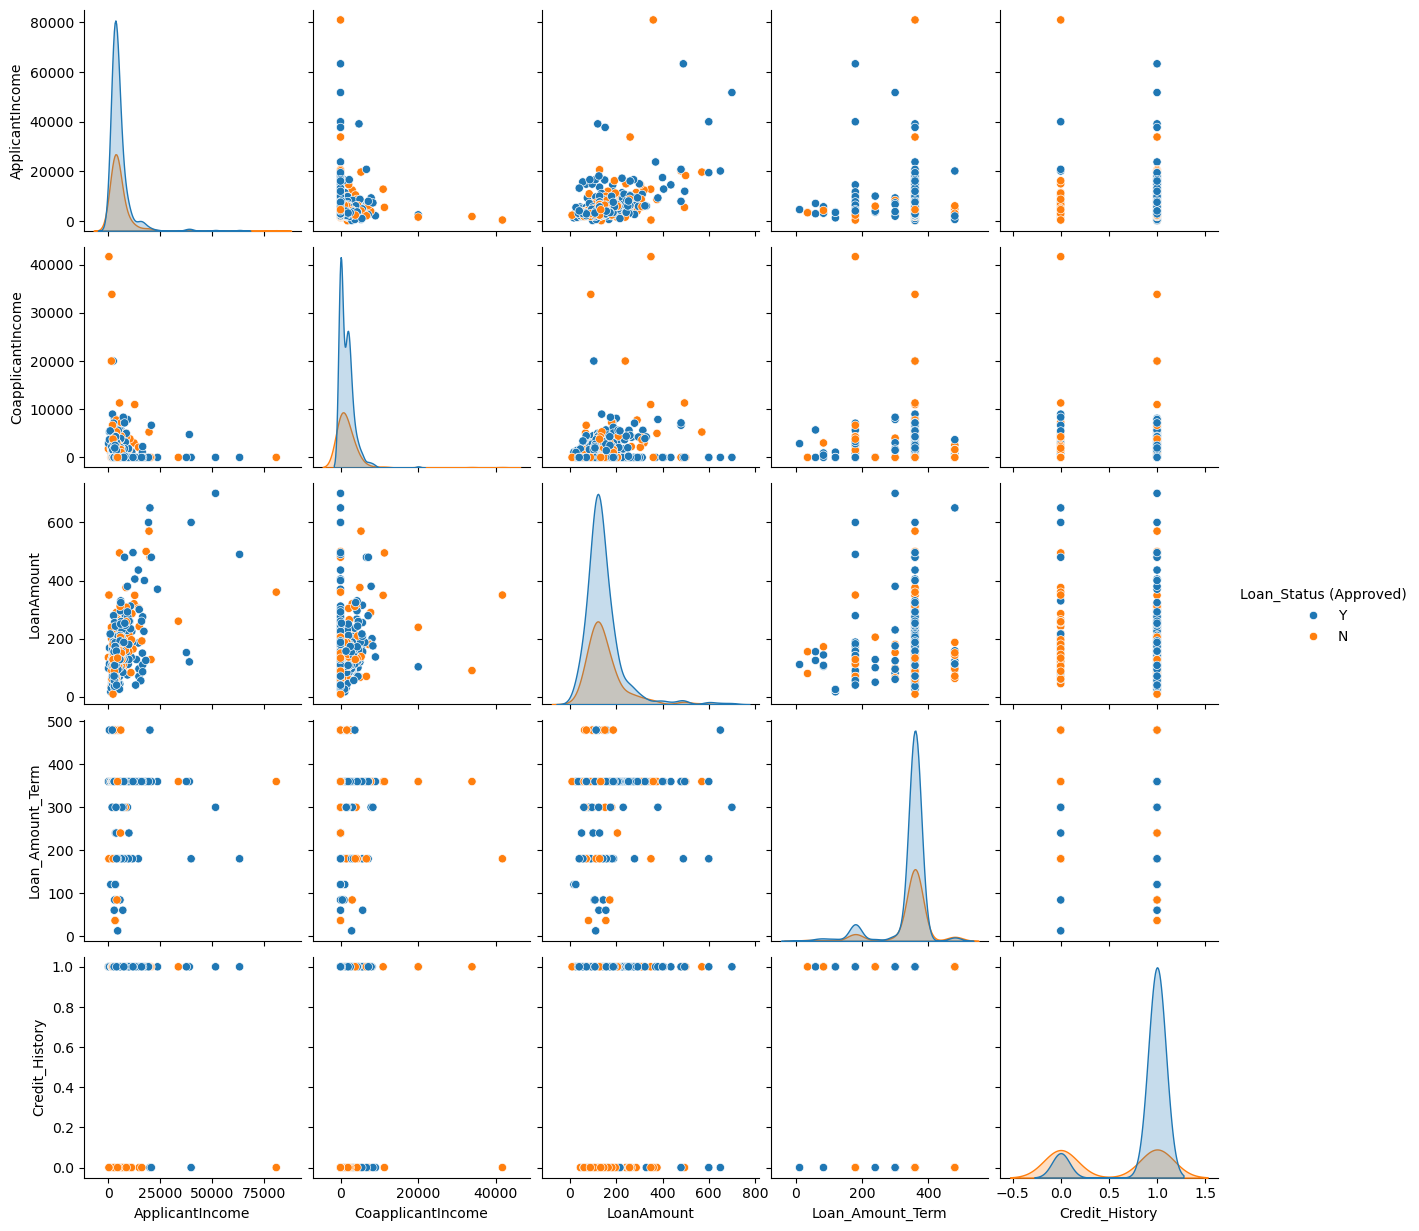

In [22]:
sns.pairplot(data=data,hue='Loan_Status (Approved)')

<Axes: xlabel='ApplicantIncome'>

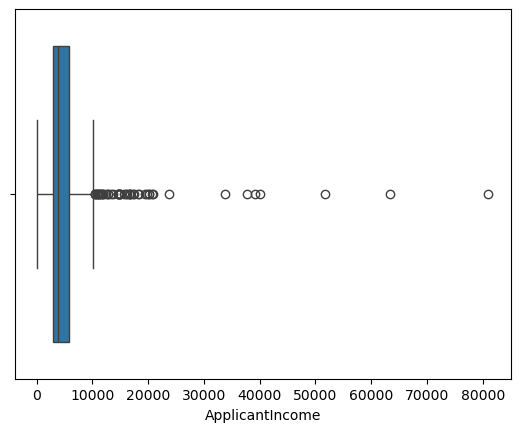

In [23]:
sns.boxplot(data.ApplicantIncome,orient='h')

<Axes: xlabel='LoanAmount'>

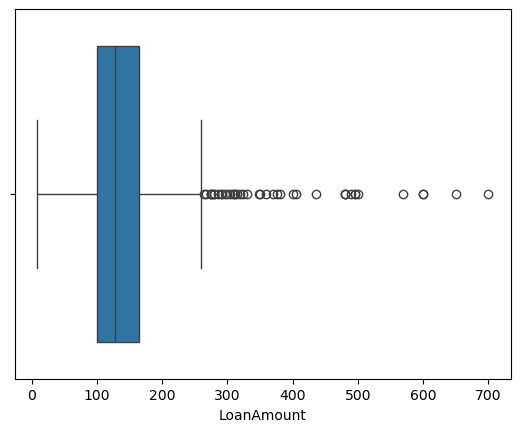

In [24]:
sns.boxplot(data.LoanAmount,orient='h')

<Axes: xlabel='LoanAmount'>

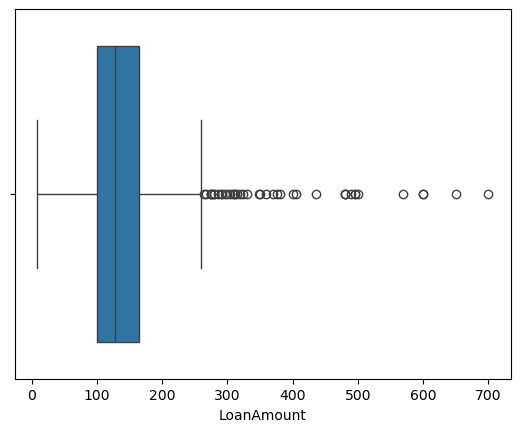

In [25]:
sns.boxplot(x='LoanAmount',data=data)

WINSORIZE

In [28]:
from scipy.stats.mstats import winsorize
trim_percentage=0.05
data['ApplicantIncome']=winsorize(data['ApplicantIncome'],limits=trim_percentage)

<Axes: xlabel='ApplicantIncome'>

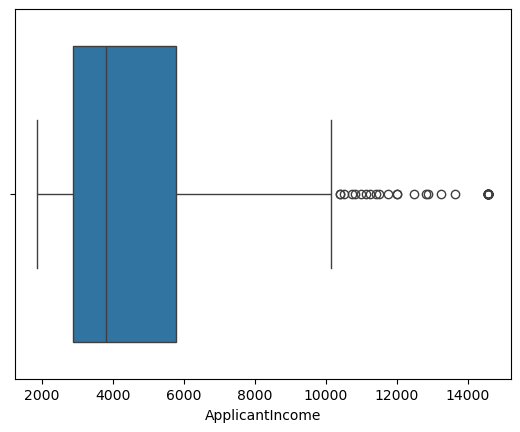

In [29]:
sns.boxplot(x='ApplicantIncome',data=data)

IQR

In [30]:
q1=data['LoanAmount'].quantile(0.25)
q3=data['LoanAmount'].quantile(0.75)


In [31]:
iqr=q3-q1
iqr

np.float64(64.5)

In [32]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound)
print(upper_bound)

3.5
261.5


In [33]:
data=data[(data['LoanAmount']>=lower_bound)&(data['LoanAmount']<=upper_bound)]

<Axes: xlabel='LoanAmount'>

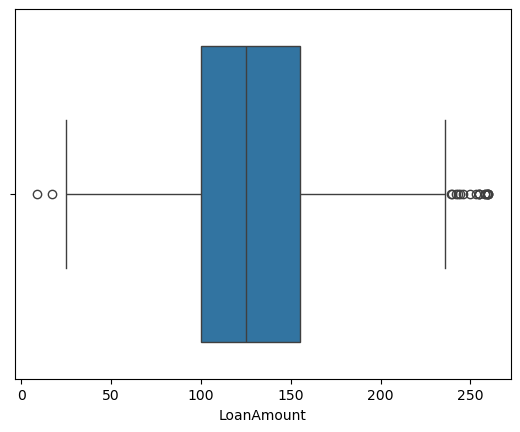

In [34]:
sns.boxplot(data.LoanAmount,orient='h')

In [35]:
data=data.drop(['Dependents'],axis=1)

In [36]:
df=data

In [37]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df=pd.get_dummies(data,columns=['Married'],prefix='Married')

In [42]:
df

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,LP001002,Male,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,True,False,False
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,True,False
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,True,False
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,True,False
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,True,False,False
610,LP002979,Male,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,False,True,False
611,LP002983,Male,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,False,True,False
612,LP002984,Male,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,False,True,False


In [43]:
encoder=LabelEncoder()
df['Loan_Status (Approved)']=encoder.fit_transform(df['Loan_Status (Approved)'])

In [44]:
df.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,LP001002,Male,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,True,False,False
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,False,True,False
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,False,True,False
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,False,True,False
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,True,False,False


In [45]:
data['Education']=data['Education'].replace({0:'Graduate',1:'NotGraduate'})

In [46]:
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:

enc=OrdinalEncoder(categories=[['Not Graduate','Graduate']])
df['Education']=enc.fit_transform(df[['Education']])

In [48]:
enc1=OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
df['Property_Area']=enc1.fit_transform(df[['Property_Area']])

In [49]:
encoder1=LabelEncoder()
df['Gender']=encoder1.fit_transform(df['Gender'])

In [50]:

df['Self_Employed']=encoder1.fit_transform(df['Self_Employed'])

In [51]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [53]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

In [54]:
df

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,1,1.0,0,8.674026,0.0,128.0,360.0,1.0,2.0,1,True,False,False
1,1,1.0,0,8.430109,1508.0,128.0,360.0,1.0,0.0,0,False,True,False
2,1,1.0,1,8.006368,0.0,66.0,360.0,1.0,2.0,1,False,True,False
3,1,0.0,0,7.856707,2358.0,120.0,360.0,1.0,2.0,1,False,True,False
4,1,1.0,0,8.699515,0.0,141.0,360.0,1.0,2.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,0.0,71.0,360.0,1.0,0.0,1,True,False,False
610,1,1.0,0,8.320205,0.0,40.0,180.0,1.0,0.0,1,False,True,False
611,1,1.0,0,8.996157,240.0,253.0,360.0,1.0,2.0,1,False,True,False
612,1,1.0,0,8.933664,0.0,187.0,360.0,1.0,2.0,1,False,True,False


In [55]:
df['CoapplicantIncome']=df.CoapplicantIncome**(1/1.2)

In [56]:
df.CoapplicantIncome

0        0.000000
1      445.315472
2        0.000000
3      646.328293
4        0.000000
          ...    
609      0.000000
610      0.000000
611     96.274078
612      0.000000
613      0.000000
Name: CoapplicantIncome, Length: 573, dtype: float64

In [57]:
df

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,1,1.0,0,8.674026,0.000000,128.0,360.0,1.0,2.0,1,True,False,False
1,1,1.0,0,8.430109,445.315472,128.0,360.0,1.0,0.0,0,False,True,False
2,1,1.0,1,8.006368,0.000000,66.0,360.0,1.0,2.0,1,False,True,False
3,1,0.0,0,7.856707,646.328293,120.0,360.0,1.0,2.0,1,False,True,False
4,1,1.0,0,8.699515,0.000000,141.0,360.0,1.0,2.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,0.000000,71.0,360.0,1.0,0.0,1,True,False,False
610,1,1.0,0,8.320205,0.000000,40.0,180.0,1.0,0.0,1,False,True,False
611,1,1.0,0,8.996157,96.274078,253.0,360.0,1.0,2.0,1,False,True,False
612,1,1.0,0,8.933664,0.000000,187.0,360.0,1.0,2.0,1,False,True,False


In [58]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])

In [59]:
df

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,1,1.0,0,8.674026,-inf,128.0,360.0,1.0,2.0,1,True,False,False
1,1,1.0,0,8.430109,6.098783,128.0,360.0,1.0,0.0,0,False,True,False
2,1,1.0,1,8.006368,-inf,66.0,360.0,1.0,2.0,1,False,True,False
3,1,0.0,0,7.856707,6.471308,120.0,360.0,1.0,2.0,1,False,True,False
4,1,1.0,0,8.699515,-inf,141.0,360.0,1.0,2.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,-inf,71.0,360.0,1.0,0.0,1,True,False,False
610,1,1.0,0,8.320205,-inf,40.0,180.0,1.0,0.0,1,False,True,False
611,1,1.0,0,8.996157,4.567199,253.0,360.0,1.0,2.0,1,False,True,False
612,1,1.0,0,8.933664,-inf,187.0,360.0,1.0,2.0,1,False,True,False


In [60]:
from scipy.stats import boxcox
transformed_data,lambda_value=boxcox(df['Loan_Amount_Term'])
print('lambda_value is:',lambda_value)

lambda_value is: 3.0185540252193874


In [61]:
df['LoanAmount']=df.LoanAmount**(1/2)

In [62]:
df

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes,Married_yes
0,1,1.0,0,8.674026,-inf,11.313708,360.0,1.0,2.0,1,True,False,False
1,1,1.0,0,8.430109,6.098783,11.313708,360.0,1.0,0.0,0,False,True,False
2,1,1.0,1,8.006368,-inf,8.124038,360.0,1.0,2.0,1,False,True,False
3,1,0.0,0,7.856707,6.471308,10.954451,360.0,1.0,2.0,1,False,True,False
4,1,1.0,0,8.699515,-inf,11.874342,360.0,1.0,2.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,-inf,8.426150,360.0,1.0,0.0,1,True,False,False
610,1,1.0,0,8.320205,-inf,6.324555,180.0,1.0,0.0,1,False,True,False
611,1,1.0,0,8.996157,4.567199,15.905974,360.0,1.0,2.0,1,False,True,False
612,1,1.0,0,8.933664,-inf,13.674794,360.0,1.0,2.0,1,False,True,False


In [64]:
df.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [69]:
x=df.drop(['Loan_Status (Approved)'],axis=1)
y=df['Loan_Status (Approved)']

In [70]:
x

,Gender,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_No,Married_Yes,Married_yes
0,1,1.0,0,8.674026,11.313708,360.0,1.0,2.0,True,False,False
1,1,1.0,0,8.430109,11.313708,360.0,1.0,0.0,False,True,False
2,1,1.0,1,8.006368,8.124038,360.0,1.0,2.0,False,True,False
3,1,0.0,0,7.856707,10.954451,360.0,1.0,2.0,False,True,False
4,1,1.0,0,8.699515,11.874342,360.0,1.0,2.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,0,7.972466,8.426150,360.0,1.0,0.0,True,False,False
610,1,1.0,0,8.320205,6.324555,180.0,1.0,0.0,False,True,False
611,1,1.0,0,8.996157,15.905974,360.0,1.0,2.0,False,True,False
612,1,1.0,0,8.933664,13.674794,360.0,1.0,2.0,False,True,False


In [71]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status (Approved), Length: 573, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
x_train

,Gender,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_No,Married_Yes,Married_yes
160,1,0.0,0,7.539027,9.899495,360.0,1.0,1.0,False,True,False
133,1,1.0,1,8.148735,5.000000,120.0,1.0,1.0,False,True,False
459,1,1.0,0,9.028099,12.649111,360.0,1.0,1.0,False,True,False
210,0,1.0,0,9.210340,14.628739,360.0,1.0,1.0,True,False,False
284,1,1.0,0,9.587612,11.313708,360.0,1.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
77,1,1.0,1,7.539027,10.488088,360.0,1.0,2.0,False,True,False
113,0,1.0,1,8.916104,11.313708,360.0,1.0,1.0,True,False,False
289,1,1.0,0,9.159889,13.674794,360.0,1.0,0.0,True,False,False
465,1,1.0,0,8.699515,11.832160,360.0,1.0,0.0,True,False,False


In [74]:
x_test

,Gender,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_No,Married_Yes,Married_yes
549,1,1.0,0,7.932003,10.488088,360.0,1.0,0.0,False,True,False
76,1,1.0,0,8.229511,13.266499,360.0,1.0,2.0,True,False,False
141,1,1.0,0,8.597297,12.961481,360.0,1.0,2.0,True,False,False
435,0,1.0,0,9.215029,11.313708,240.0,1.0,1.0,False,False,True
582,0,1.0,0,8.060224,6.000000,360.0,1.0,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
75,1,1.0,0,8.229511,10.630146,480.0,1.0,2.0,True,False,False
473,0,1.0,1,7.824046,9.643651,360.0,0.0,2.0,True,False,False
191,1,1.0,0,9.392662,12.806248,360.0,1.0,1.0,True,False,False
305,1,0.0,0,7.600902,11.313708,360.0,1.0,2.0,True,False,False


In [76]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [77]:
x_train_std

array([[ 0.36896919, -1.73493516, -0.41827791, ..., -0.74044753,
         0.74853943, -0.07079923],
       [ 0.36896919,  0.57639042,  1.55500965, ..., -0.74044753,
         0.74853943, -0.07079923],
       [ 0.36896919,  0.57639042, -0.41827791, ..., -0.74044753,
         0.74853943, -0.07079923],
       ...,
       [ 0.36896919,  0.57639042, -0.41827791, ...,  1.35053458,
        -1.33593496, -0.07079923],
       [ 0.36896919,  0.57639042, -0.41827791, ...,  1.35053458,
        -1.33593496, -0.07079923],
       [ 0.36896919, -1.73493516, -0.41827791, ..., -0.74044753,
         0.74853943, -0.07079923]])

In [78]:
scaler1=MinMaxScaler()
x_train_mi=scaler1.fit_transform(x_train)
x_test_mi=scaler1.fit_transform(x_test)

In [79]:
x_train_mi

array([[0.5, 0. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 1. , 0.5, ..., 0. , 1. , 0. ],
       [0.5, 1. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0.5, 1. , 0. , ..., 1. , 0. , 0. ],
       [0.5, 1. , 0. , ..., 1. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 1. , 0. ]])

In [80]:
scaler2=RobustScaler()
x_train_rob=scaler2.fit_transform(x_train)
x_test_rob=scaler2.fit_transform(x_test)

In [81]:
x_train_rob

array([[ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.]])